In [2]:
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point
import osmnx as ox

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


In [3]:
df = pd.read_json("../../scripts/Metropolis_CVE.json")

In [5]:
c = 'Guadalajara'
res = 8

In [25]:
year = 2010

#Folder names from database
block_schema = 'censo'
block_cnt_folder = f'censo_mza_centroid_{year}'
mpos_schema = 'marco'
mpos_folder = f'mpos_{year}'

# Creates empty GeoDataFrame to store block locations
block_centroid = gpd.GeoDataFrame()
mun_gdf = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {block_schema}.{block_cnt_folder} WHERE \"cvegeo\" LIKE \'{m}%%\'"
    block_centroid = block_centroid.append(aup.gdf_from_query(query, geometry_col='geometry'))
    #query = f"SELECT * FROM {block_census_schema}.{block_census_folder} WHERE \"CVEGEO\" LIKE \'{m}%%\'"
    #block_pop = block_pop.append(aup.df_from_query(query))
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {mpos_schema}.{mpos_folder} WHERE \"CVEGEO\" LIKE \'{m}\'"
    mun_gdf = mun_gdf.append(aup.gdf_from_query(query, geometry_col='geometry'))

block_centroid = block_centroid.to_crs("EPSG:4326")
print(block_centroid.shape)
block_centroid.head(2)

(46576, 193)


,cvegeo,geometry,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,...,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,metropolis
0,1400200010064038,POINT (-103.60240 20.42853),136,74,62,9,6,3,127,68,...,27,30,28,27,15,7,13,23,4,Guadalajara
1,1400200010030021,POINT (-103.58913 20.42100),193,90,103,8,3,5,183,86,...,39,51,49,45,18,13,26,36,8,Guadalajara


In [54]:
block_centroid.prom_ocup.astype('float').mean()

3.490772517444981

In [26]:
block_centroid.columns.to_list()

['cvegeo',
 'geometry',
 'pobtot',
 'pobmas',
 'pobfem',
 'p_0a2',
 'p_0a2_m',
 'p_0a2_f',
 'p_3ymas',
 'p_3ymas_m',
 'p_3ymas_f',
 'p_5ymas',
 'p_5ymas_m',
 'p_5ymas_f',
 'p_12ymas',
 'p_12ymas_m',
 'p_12ymas_f',
 'p_15ymas',
 'p_15ymas_m',
 'p_15ymas_f',
 'p_18ymas',
 'p_18ymas_m',
 'p_18ymas_f',
 'p_3a5',
 'p_3a5_m',
 'p_3a5_f',
 'p_6a11',
 'p_6a11_m',
 'p_6a11_f',
 'p_8a14',
 'p_8a14_m',
 'p_8a14_f',
 'p_12a14',
 'p_12a14_m',
 'p_12a14_f',
 'p_15a17',
 'p_15a17_m',
 'p_15a17_f',
 'p_18a24',
 'p_18a24_m',
 'p_18a24_f',
 'p_15a49_f',
 'p_60ymas',
 'p_60ymas_m',
 'p_60ymas_f',
 'rel_h_m',
 'pob0_14',
 'pob15_64',
 'pob65_mas',
 'prom_hnv',
 'pnacent',
 'pnacent_m',
 'pnacent_f',
 'pnacoe',
 'pnacoe_m',
 'pnacoe_f',
 'pres2005',
 'pres2005_m',
 'pres2005_f',
 'presoe05',
 'presoe05_m',
 'presoe05_f',
 'p3ym_hli',
 'p3ym_hli_m',
 'p3ym_hli_f',
 'p3hlinhe',
 'p3hlinhe_m',
 'p3hlinhe_f',
 'p3hli_he',
 'p3hli_he_m',
 'p3hli_he_f',
 'p5_hli',
 'p5_hli_nhe',
 'p5_hli_he',
 'phog_ind',
 'pcon

In [20]:
query = f"SELECT * FROM hexgrid.hexgrid_8_city WHERE \"metropolis\" LIKE \'{c}\'"
hex_gdf = aup.gdf_from_query(query, geometry_col='geometry')

hex_gdf = hex_gdf[['hex_id_8','geometry']].copy()

print(hex_gdf.shape)
hex_gdf.head(2)

(4095, 2)


,hex_id_8,geometry
0,8849abc91bfffff,"POLYGON ((-103.60989 20.39686, -103.61044 20.4..."
1,88498c94c5fffff,"POLYGON ((-103.34195 20.71141, -103.33741 20.7..."


In [49]:
avg_column = [
    "prom_hnv",
    "graproes",
    "graproes_f",
    "graproes_m",
    "prom_ocup",
    "pro_ocup_c",
]
# sum data for weighted averaged
avg_dict = {
    "prom_hnv": "pobtot",
    "graproes": "pobtot",
    "graproes_f": "pobfem",
    "graproes_m": "pobmas",
    "prom_ocup": "tothog",
    "pro_ocup_c": "tothog",
}

string_columns = [
    'cvegeo',
    'cve_ent',
    'cve_mun',
    'cve_loc',
    'cve_ageb',
    'cve_mza',
    'ambito',
    'tipomza',
    'field_1',
    'entidad',
    'nom_ent',
    'mun',
    'nom_mun',
    'loc',
    'nom_loc',
    'ageb',
    'mza'
]

string_columns = []

column_start = 2
column_end = len(block_centroid)-1

In [50]:
hex_pop = aup.socio_points_to_polygon(hex_gdf, block_centroid,'hex_id_8',
                                       string_columns,
                                       wgt_dict=avg_dict,
                                       avg_column=avg_column)

In [51]:
print(hex_pop.shape)
hex_pop.head(5)

(1005, 193)


,cvegeo,pobtot,pobmas,pobfem,p_0a2,p_0a2_m,p_0a2_f,p_3ymas,p_3ymas_m,p_3ymas_f,...,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter,metropolis,hex_id_8
0,1400200010064038140020001011500114002000101680...,1936.0,952.0,984.0,110.0,49.0,50.0,1814.0,893.0,921.0,...,464.0,431.0,379.0,186.0,83.0,152.0,361.0,48.0,GuadalajaraGuadalajaraGuadalajaraGuadalajaraGu...,8849abc9e7fffff
1,1400200010030021140020001003001114002000100300...,1669.0,820.0,845.0,83.0,33.0,43.0,1564.0,774.0,790.0,...,415.0,405.0,354.0,193.0,121.0,184.0,325.0,68.0,GuadalajaraGuadalajaraGuadalajaraGuadalajaraGu...,8849abc933fffff
2,1400200010030001140020001003000214002000100300...,2611.0,1241.0,1370.0,137.0,54.0,70.0,2455.0,1173.0,1282.0,...,652.0,637.0,568.0,326.0,222.0,350.0,519.0,146.0,GuadalajaraGuadalajaraGuadalajaraGuadalajaraGu...,8849abc9e5fffff
3,1400200010030047140020001003006114002000100790...,756.0,374.0,364.0,33.0,15.0,13.0,694.0,348.0,344.0,...,178.0,169.0,152.0,124.0,75.0,80.0,158.0,49.0,GuadalajaraGuadalajaraGuadalajaraGuadalajaraGu...,8849abc9edfffff
4,1400200010030050140020001003005214002000100300...,1998.0,985.0,1009.0,119.0,47.0,55.0,1858.0,917.0,941.0,...,509.0,497.0,434.0,290.0,163.0,207.0,434.0,103.0,GuadalajaraGuadalajaraGuadalajaraGuadalajaraGu...,8849aa26d9fffff


In [55]:
hex_pop.pobtot.sum()

4379576.0

In [56]:
hex_pop.prom_ocup.mean()

3.9376201729620313

In [13]:
hex_mrg = hex_gdf.merge(hex_pop, on='hex_id_8')

In [14]:
hex_mrg['dens_pobha'] = hex_mrg.pobtot / (hex_mrg.area / 10000)

<AxesSubplot:>

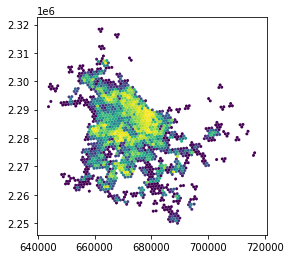

In [15]:
hex_mrg.plot('dens_pobha', 'viridis')

In [16]:
block_10 = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/CntMnz_AnalisisVivienda_INEGI10_UTM_v2.shp', driver='ESRIShapefile')
print(block_10.shape)
block_10.head(2)

(46290, 8)


,CVEGEO,10_pobtot,10_vivtot,10_tvivpar,10_vivpar_,10_ocupviv,10_prom_oc,geometry
0,1403000030177021,13,3,*,*,13,4.33,POINT (695361.391 2256355.831)
1,1403000030177026,167,45,*,*,167,4.28,POINT (694580.146 2256077.440)


In [17]:
block_10.rename(columns={
    '10_tvivpar':'10_tvivparhab',
    '10_vivpar_':'10_vivpar_des',
    '10_prom_oc':'10_prom_ocup'
}, inplace=True)

In [20]:
block_10.replace('*',0, inplace=True)
block_10.replace(-6,0, inplace=True)
block_10.replace(-8,0, inplace=True)
block_10.replace(-9,0, inplace=True)
block_10.replace('N/D', inplace=True)

TypeError: No matching signature found

In [21]:
block_10['10_vivtot'] = block_10['10_vivtot'].astype('float')
block_10['10_tvivparhab'] = block_10['10_tvivparhab'].astype('float')
block_10['10_vivpar_des'] = block_10['10_vivpar_des'].astype('float')
block_10['10_ocupviv'] = block_10['10_ocupviv'].astype('float')
block_10['10_prom_ocup'] = block_10['10_prom_ocup'].astype('float')

In [22]:
block_10['10_tvivparhab'] = block_10['10_pobtot'].loc[block_10['10_prom_ocup']>0] / block_10['10_prom_ocup'].loc[block_10['10_prom_ocup']>0]
block_10['10_vivpar_des'] = block_10['10_vivtot'] - block_10['10_tvivparhab']

In [23]:
avg_column = [
    "10_prom_ocup",
]
# sum data for weighted averaged
avg_dict = {
    "10_prom_ocup": "10_tvivparhab",
}

string_columns = [
    'CVEGEO',
]

column_start = 1
column_end = len(block_10)-1

In [24]:
hex_pop = aup.socio_points_to_polygon(hex_gdf, block_10,'hex_id_8',
                                       string_columns,
                                       wgt_dict=avg_dict,
                                       avg_column=avg_column)
print(hex_pop.shape)
hex_pop.head(5)

(987, 7)


,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupviv,10_prom_ocup,hex_id_8
0,326.0,104.0,81.048027,20.951981,324.0,3.99763,8849aa2b35fffff
0,12156.0,3660.0,3230.029541,428.970398,12035.0,3.762504,88498c94c5fffff
0,13953.0,3480.0,3116.593018,355.407227,13828.0,4.467699,88498c94e9fffff
0,11388.0,3476.0,3085.590332,379.409668,11081.0,3.684546,88498c94c9fffff
0,9789.0,3198.0,2869.935547,328.064545,9440.0,3.410878,88498c94cdfffff


In [25]:
hex_pop['10_pobtot'].sum()

4359274.0

In [32]:
hex_mrg_10_20 = hex_mrg.merge(hex_pop, on='hex_id_8', how='left')

In [37]:
hex_mrg.shape

(1438, 224)

In [33]:
hex_mrg_10_20.shape

(1438, 230)

In [34]:
print(hex_mrg_10_20.shape)
hex_mrg_10_20.head(2)

(1438, 230)


,hex_id_8,geometry,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,...,vph_sinltc,vph_sincin,vph_sintic,dens_pobha,10_pobtot,10_vivtot,10_tvivparhab,10_vivpar_des,10_ocupviv,10_prom_ocup
0,88498c9461fffff,"POLYGON ((678635.955 2287401.427, 678104.563 2...",15218.0,7893.0,7312.0,461.0,150.0,166.0,14674.0,7632.0,...,16.0,955.0,-11.0,174.335918,17312.0,4366.0,3924.322021,434.677856,16973.0,4.403563
1,88498c96b5fffff,"POLYGON ((670132.637 2291099.433, 669663.238 2...",5976.0,3204.0,2765.0,83.0,36.0,18.0,5832.0,3130.0,...,-11.0,90.0,-3.0,68.437102,6362.0,2187.0,1981.187988,203.812119,5923.0,3.20969


In [35]:
hex_mrg_10_20['10_dens_pobha'] = hex_mrg_10_20['10_pobtot'] / (hex_mrg_10_20.area / 10000)

<AxesSubplot:>

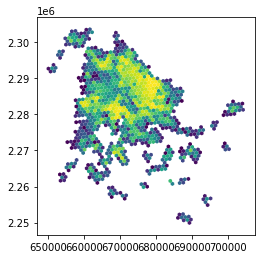

In [36]:
hex_mrg_10_20.plot('10_dens_pobha', 'viridis')

In [60]:
hex_mrg_10_20['T_Viv_10_20'] = hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['R_TViv_10_20'] = (hex_mrg_10_20['vivtot'] - hex_mrg_10_20['10_vivtot']) / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['T_VivDes_10_20'] = hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['R_TVivDes_10_20'] = (hex_mrg_10_20['vivpar_des'] - hex_mrg_10_20['10_vivpar_des']) / hex_mrg_10_20['10_vivpar_des']
hex_mrg_10_20['Z_RTVivDes_10_20'] = (hex_mrg_10_20['R_TVivDes_10_20']-hex_mrg_10_20['R_TVivDes_10_20'].mean()) / hex_mrg_10_20['R_TVivDes_10_20'].std()
hex_mrg_10_20['Z_RTViv_10_20'] = (hex_mrg_10_20['R_TViv_10_20']-hex_mrg_10_20['R_TViv_10_20'].mean()) / hex_mrg_10_20['R_TViv_10_20'].std()
hex_mrg_10_20['R_VivHab_20'] = hex_mrg_10_20['tvivparhab'] / hex_mrg_10_20['vivtot']
hex_mrg_10_20['Z_RVivHab_20'] = (hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_20'].mean()) / hex_mrg_10_20['R_VivHab_20'].std()
hex_mrg_10_20['R_VivHab_10'] = hex_mrg_10_20['10_tvivparhab'] / hex_mrg_10_20['10_vivtot']
hex_mrg_10_20['Z_RVivHab_10'] = (hex_mrg_10_20['R_VivHab_10'] - hex_mrg_10_20['R_VivHab_10'].mean()) / hex_mrg_10_20['R_VivHab_10'].std()
hex_mrg_10_20['Chng_RVivHab_10'] = hex_mrg_10_20['R_VivHab_20'] - hex_mrg_10_20['R_VivHab_10']

In [58]:
hex_mrg_10_20.replace(np.nan, 0, inplace=True)

In [61]:
hex_mrg_10_20.to_file('/home/edgar/SIG/ObsCds/Proyectos/Vivienda_Deshabitada/Info_Sociodemografica/hex_block_CPyV20_AnalisisVivienda10_UTM_v1.geojson', driver='GeoJSON')

In [53]:
for c in hex_mrg_10_20:
    print((hex_mrg_10_20[c]).dtype)

object
geometry
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
obje